### Chapter 3 Select Applied Solutions 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)


**Problem 8**

In [3]:
Auto = pd.read_csv('Auto.csv') 

In [24]:
y = Auto['mpg']
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                  'horsepower': Auto['horsepower']})
model = sm.OLS(y, X)
results = model.fit()
summarize(results)


,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


i)  Yes, p values less than 0.05 
ii) Not very strong -0.1578 mpg per horsepower 
iii) Negative given the coeficient 


In [32]:
#Confidence interval on the mean of the predicted value
newdf=pd.DataFrame({'point':[98]})
newdf=sm.add_constant(newdf,has_constant='add')
predict = results.get_prediction(newdf)
predict.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


C:\Users\campz\AppData\Local\Temp\ipykernel_3444\2012961864.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax,results.params[0],results.params[1],'r--',linewidth=3);


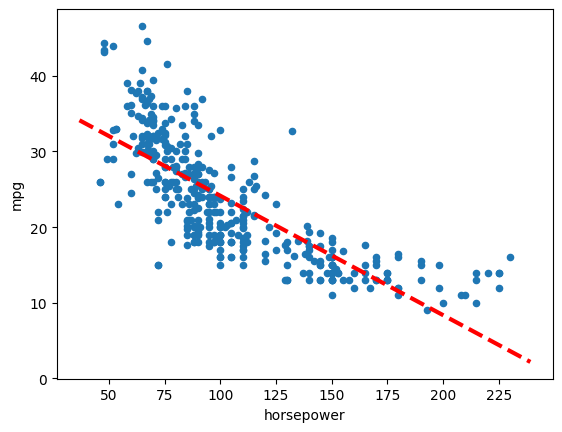

In [33]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,results.params[0],results.params[1],'r--',linewidth=3);

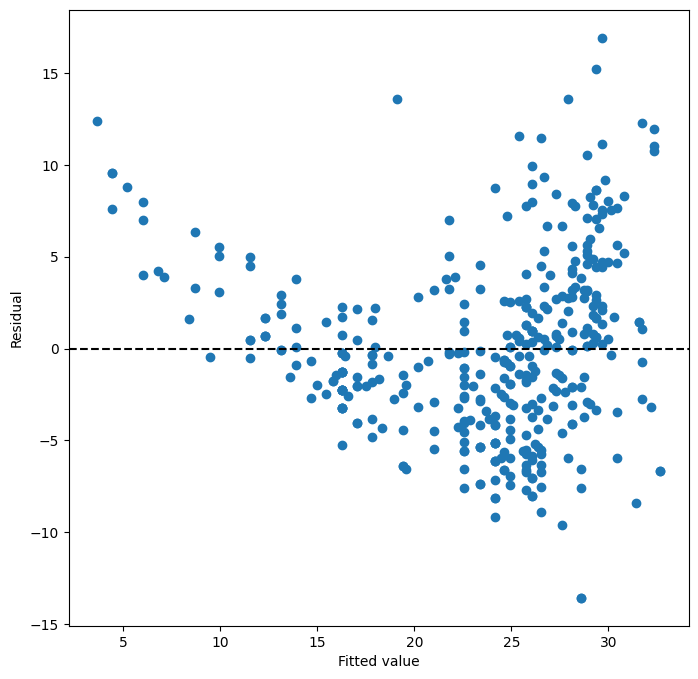

In [34]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

Funnel shape = BAD 

**Problem 9**

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

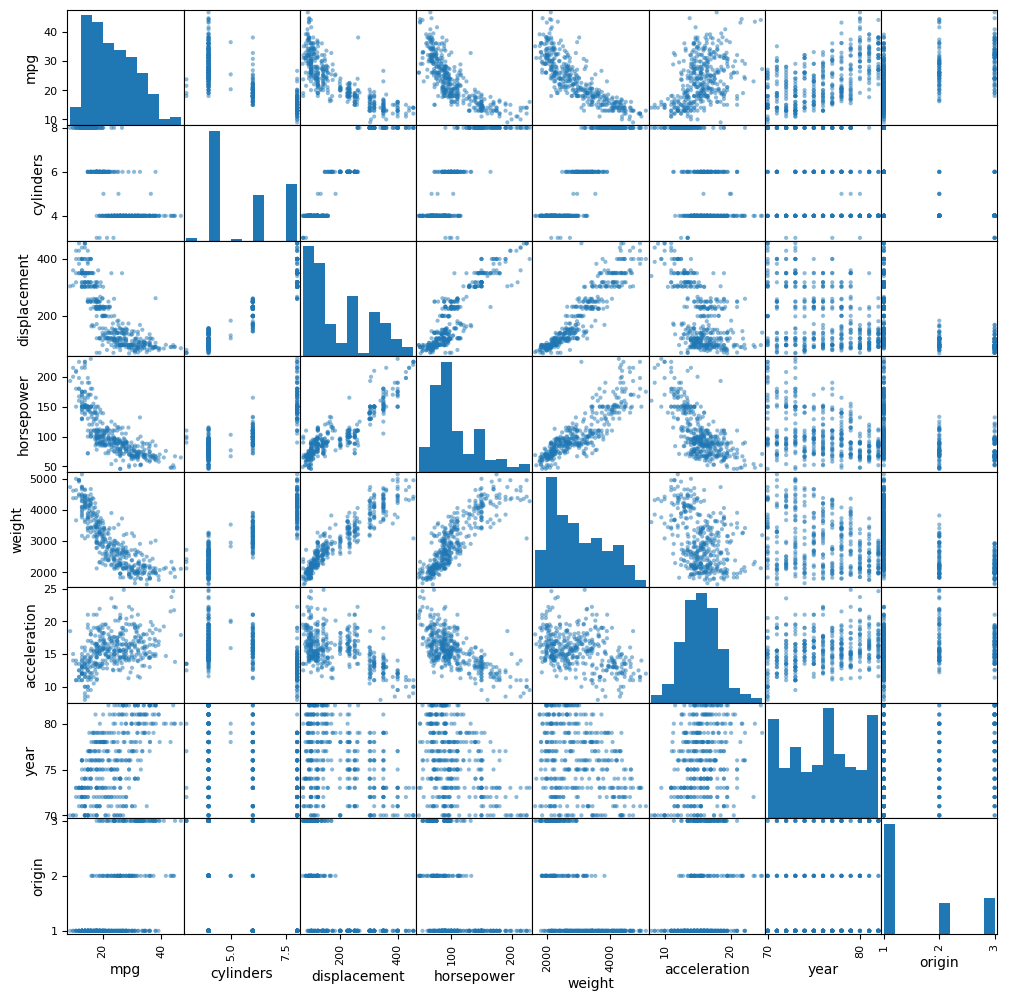

In [37]:
pd.plotting.scatter_matrix(Auto, figsize=(12,12))

In [39]:
Auto.corr(numeric_only = True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [46]:
df = Auto.drop(columns = ['name', 'mpg'])
X = MS(df).fit_transform(Auto)
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 11 May 2025   Prob (F-statistic):          2.04e-139
Time:                        12:05:17   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#reject Null since F >> 1 fit is better than null
res1=smf.ols('y~X',data=Auto).fit()
anova_lm(res1)

,df,sum_sq,mean_sq,F,PR(>F)
X,8.0,19576.082069,2447.010259,220.979533,1.326882e-138
Residual,384.0,4252.212530,11.073470,NaN,NaN


Text(0, 0.5, 'Residual')

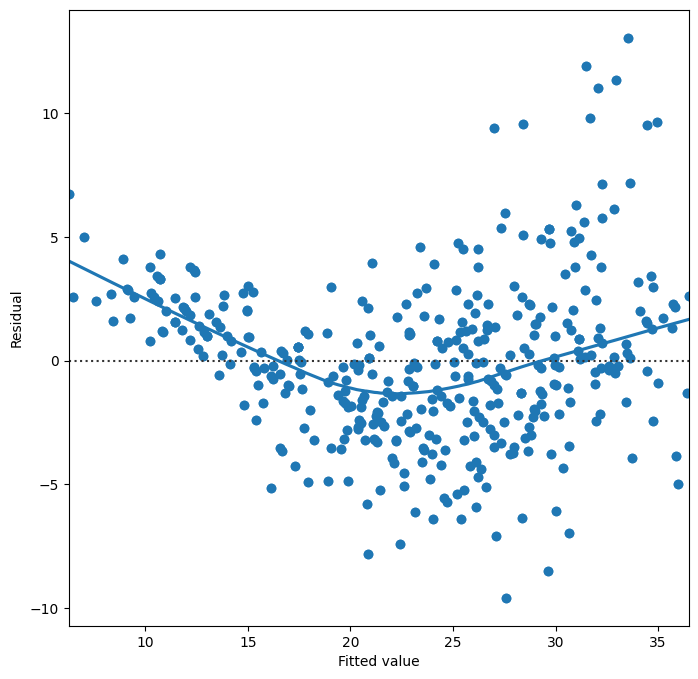

In [52]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results1.fittedvalues, results1.resid)
sns.residplot(data=Auto,x=results1.fittedvalues,y='mpg',lowess=True)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')


Funneling whihc is bad! Pattern in residulas

In [79]:
Auto.shape
avglvg = 2*Auto.shape[1] /Auto.shape[0]
avglvg


0.04591836734693878

So basically the leverage plot can show any point that has high leverage and rule fo thumb is that those points lie above the average leverage as calculated above. In this case only one pointhas high leverage. Hgih leverage points in regression analysis are data points that exert a disproportionate influence on the estimated regression line due to their extreme values in the predctor variable (x values)

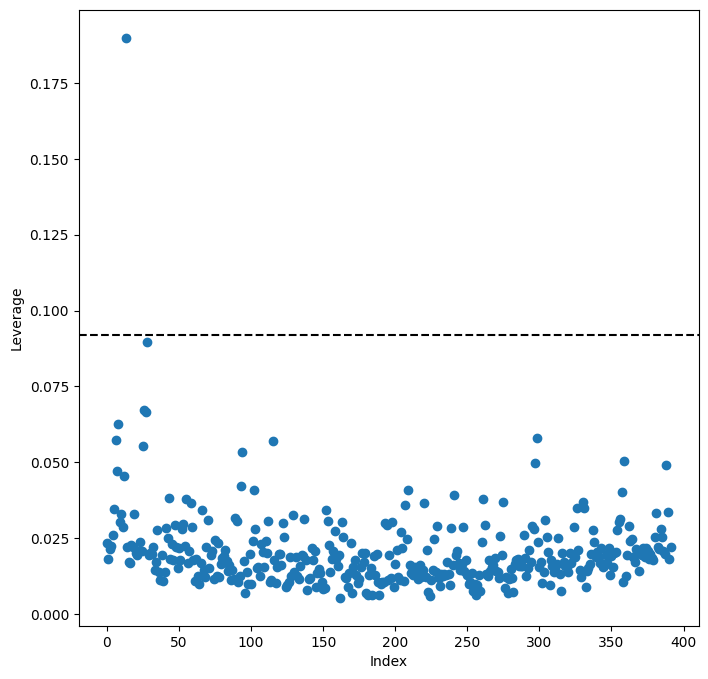

In [80]:
infl = results1.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
infl.hat_matrix_diag[np.argmax(infl.hat_matrix_diag)]
ax.axhline(2*avglvg, c='k', ls='--')

In [62]:
#Let's try out some interaction terms
model2 = smf.ols(formula='mpg ~ displacement*origin + year', data=Auto) # the formula automatically
# applies the hierarchy principle
print(summarize(model2.fit()))
model3 = smf.ols(formula='mpg ~ horsepower*weight + origin', data=Auto)
print(summarize(model3.fit()))

                        coef  std err       t  P>|t|
Intercept           -32.6362    4.725  -6.907  0.000
displacement          0.0065    0.009   0.712  0.477
origin                6.5265    0.946   6.902  0.000
displacement:origin  -0.0487    0.008  -5.785  0.000
year                  0.7494    0.056  13.418  0.000
                       coef   std err       t  P>|t|
Intercept          59.27830  2.718000  21.807  0.000
horsepower         -0.24080  0.027000  -8.852  0.000
weight             -0.00980  0.001000 -11.679  0.000
horsepower:weight   0.00005  0.000007   7.455  0.000
origin              0.93090  0.309000   3.017  0.003


In [64]:
model4 = smf.ols(formula = 'mpg~ horsepower + np.log(year) + origin', data = Auto)
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     368.6
Date:                Sun, 11 May 2025   Prob (F-statistic):          3.59e-113
Time:                        12:23:47   Log-Likelihood:                -1097.0
No. Observations:                 392   AIC:                             2202.
Df Residuals:                     388   BIC:                             2218.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -183.7292     20.102     -9.140      0.000    -223.252    -144.207
horsepower      -0.1069      0.006    -16.765      0.000      -0.119      -0.094
np.log(year)    49.4832      4.578     10.808      0.000      40.482      58.484
origin           2.6121      0.282      9.277      0.000       2.058       3.166
==============================================================================
Omnibus:                       16.907   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.923
Skew:                           0.490   Prob(JB):                     0.000128
Kurtosis:                       3.371   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
model4 = smf.ols(formula = 'mpg~ horsepower + np.power(year,2)+ origin', data = Auto)
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     378.9
Date:                Sun, 11 May 2025   Prob (F-statistic):          6.81e-115
Time:                        12:24:45   Log-Likelihood:                -1093.0
No. Observations:                 392   AIC:                             2194.
Df Residuals:                     388   BIC:                             2210.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.8413      2.686      1.802      0.072      -0.440      10.123
horsepower           -0.1063      0.006    -16.862      0.000      -0.119      -0.094
np.power(year, 2)     0.0044      0.000     11.281      0.000       0.004       0.005
origin                2.6037      0.279      9.342      0.000       2.056       3.152
==============================================================================
Omnibus:                       17.011   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.076
Skew:                           0.489   Prob(JB):                     0.000119
Kurtosis:                       3.390   Cond. No.                     7.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Problem 14**

In [68]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0,1,size = 100)
x2 = 0.5 * x1 + rng.normal(size = 100) /10 
y = 2 + 2*x1 +0.1 * x2 + rng.normal(size =100)


In [70]:
correlation = np.corrcoef(x1,x2)
correlation[0,1]

0.772324497691354

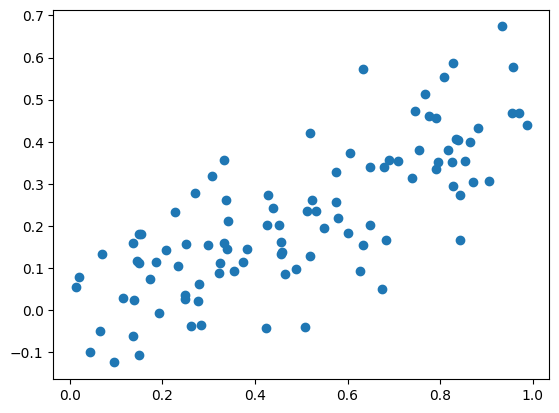

In [71]:
plt.scatter(x1,x2 
            )

In [73]:
model5 = smf.ols(formula = 'y~x1 + x2', data = pd.DataFrame({'x1':x1,'x2':x2}))
summarize(model5.fit())

,coef,std err,t,P>|t|
Intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.7428,0.831,0.894,0.374


Cannot reject B2 null hypothesis 

In [81]:
modd = smf.ols(formula = 'y~x1', data = pd.DataFrame({'x1':x1}))
summarize(modd.fit())

,coef,std err,t,P>|t|
Intercept,1.9415,0.189,10.291,0.0
x1,1.9791,0.334,5.918,0.0


Can reject

In [82]:
modd2 = smf.ols(formula = 'y~x2', data = pd.DataFrame({'x2':x2}))
summarize(modd2.fit())

,coef,std err,t,P>|t|
Intercept,2.3239,0.154,15.124,0.0
x2,2.7103,0.550,4.927,0.0


Can reject

Not contridictary since the paramters are highly correlated 

**Problem 15**

In [94]:
Boston = load_data('Boston')
y = Boston['crim']

pvals = []
results = []
for column in Boston.columns:
    if column != 'crim':
        model = smf.ols(formula = 'crim ~ {}'.format(column), data = Boston)
        pvals.append({column:model.fit().pvalues[1]})  
        results.append(model.fit().params[1])


results

C:\Users\campz\AppData\Local\Temp\ipykernel_3444\2046971314.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvals.append({column:model.fit().pvalues[1]})
C:\Users\campz\AppData\Local\Temp\ipykernel_3444\2046971314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append(model.fit().params[1])
C:\Users\campz\AppData\Local\Temp\ipykernel_3444\2046971314.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvals.append({c

[-0.07393497740412368,
 0.5097763311042306,
 -1.892776550803758,
 31.248531201122923,
 -2.684051224113948,
 0.1077862271395331,
 -1.5509016824100994,
 0.6179109273272014,
 0.02974225282276537,
 1.1519827870705872,
 0.5488047820623981,
 -0.363159922257603]

In [98]:
X= Boston.drop(columns = ['crim'])
model = sm.OLS(Boston['crim'], X)
summarize(model.fit())
multi = model.fit().params
multi


zn         0.045040
indus     -0.069868
chas      -0.856788
nox       -4.043084
rm         1.217273
age       -0.003265
dis       -0.776230
rad        0.552297
tax       -0.002279
ptratio   -0.059774
lstat      0.196566
medv      -0.179703
dtype: float64

Cannot reject for: indus, chas, nox, age, tax, ptratio

Text(0, 0.5, 'multi')

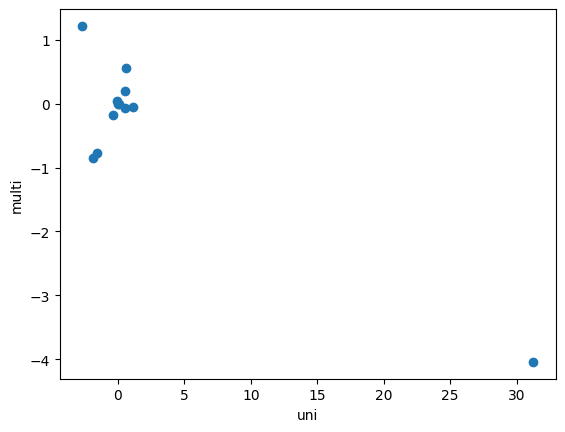

In [100]:

plt.scatter(results, multi)
plt.xlabel("uni")
plt.ylabel("multi")


In [105]:
rsquared = [] 

for column in Boston.columns:
    if column != 'crim':
        model = smf.ols(formula = 'crim ~ np.power({},3)'.format(column), data = Boston) 
        rsquared.append(model.fit().rsquared_adj)

rsquared

[0.014797727925282111,
 0.08626947656945738,
 0.0011459401318837381,
 0.1360732453415383,
 0.03343245994098576,
 0.15813513755934994,
 0.04746837259885117,
 0.39853966971866706,
 0.36282571175676426,
 0.08989977378055647,
 0.18686460335080257,
 0.03150160573738814]

Bad models for all the 3rd power models